In [1]:
from pathlib import Path

import rasterio as r
from rasterio import plot

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
p = Path('./input/raster/S2A_MSIL2A_20190404T101031_N0211_R022_T33UVT_20190404T174806.SAFE/GRANULE/L2A_T33UVT_A019753_20190404T101025/IMG_DATA/R10m')

In [ ]:
b02 = r.open(p / 'T33UVT_20190404T101031_B02_10m.jp2')
b03 = r.open(p / 'T33UVT_20190404T101031_B03_10m.jp2')
b04 = r.open(p / 'T33UVT_20190404T101031_B04_10m.jp2')
b08 = r.open(p / 'T33UVT_20190404T101031_B08_10m.jp2')

In [4]:
# number of bands
b02.count

1

In [5]:
# image width and height
b02.width, b02.height

(10980, 10980)

In [6]:
# projection
b02.crs, b02.transform

(CRS.from_dict(init='epsg:32633'),
 Affine(10.0, 0.0, 399960.0,
        0.0, -10.0, 5800020.0))

In [7]:
# data types
b02.dtypes[0]

'uint16'

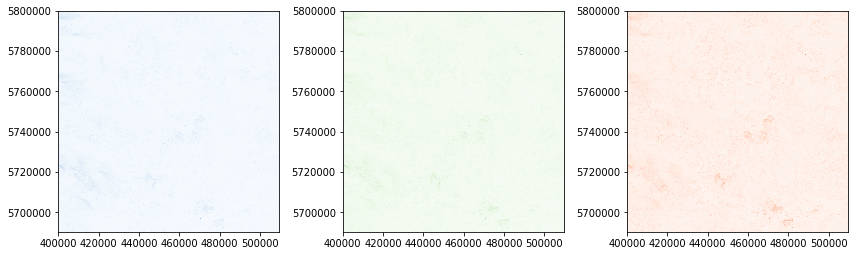

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(b02, ax=ax1, cmap='Blues')
plot.show(b03, ax=ax2, cmap='Greens')
plot.show(b04, ax=ax3, cmap='Reds')
fig.tight_layout()

In [9]:
# combine multiple bands to a single true color composite
with r.open('./20190404_true_color.tiff', 'w' ,driver='Gtiff',
            width=b04.width, height=b04.height, count=3,
            crs=b04.crs, transform=b04.transform,
            dtype=b04.dtypes[0]) as true_color_composite:
    true_color_composite.write(b02.read(1), 3) # blue
    true_color_composite.write(b03.read(1), 2) # blue
    true_color_composite.write(b04.read(1), 1) # blue

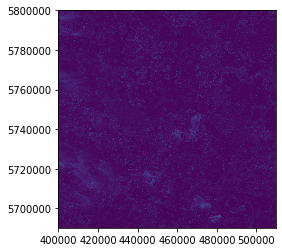

In [10]:
# diplay our composite
plot.show(r.open('./20190404_true_color.tiff'))

In [11]:
# this times out unfortunately
# plot.show_hist(r.open('./20190404_true_color.tiff'), bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

In [ ]:
with r.open('./20190404_true_color.tiff') as f:
    plot.show_hist(f, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")